In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
print('x_train shape:',x_train.shape)
print('train samples:',x_train.shape[0])
print('test samples:',x_test.shape[0])

x_train shape: (50000, 32, 32, 3)
train samples: 50000
test samples: 10000


In [4]:
num_train, img_rows, img_cols, img_channels = x_train.shape

In [5]:
image_shape = (img_rows,img_cols,3)

In [6]:
classes = np.unique(y_train)
n_classes = len(classes)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

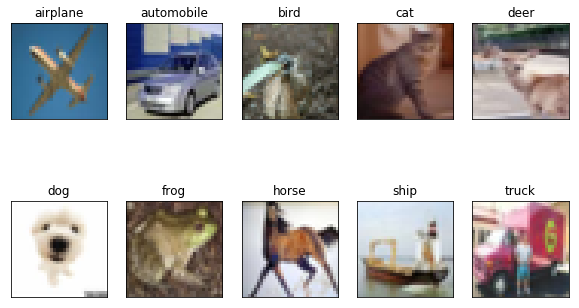

In [7]:
fig = plt.figure(figsize=(10,6))

for i in range(n_classes):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    image = features_idx[img_num,::].reshape(image_shape)
    ax.set_title(class_names[i])
    plt.imshow(image)

plt.show()

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

n_classes = 10
y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=image_shape))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [11]:
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [12]:
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [13]:
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(n_classes,activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [15]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [16]:
callbacks = [EarlyStopping(monitor='val_acc',patience=5)]

In [17]:
batch_size = 128
n_epochs = 20

In [18]:
results = model.fit(x_train,y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test,y_test),callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 382s 8ms/step - loss: 1.8577 - acc: 0.3671 - val_loss: 1.3376 - val_acc: 0.5176
Epoch 2/20
50000/50000 [==============================] - 404s 8ms/step - loss: 1.2722 - acc: 0.5407 - val_loss: 1.0815 - val_acc: 0.6112
Epoch 3/20
50000/50000 [==============================] - 420s 8ms/step - loss: 1.0440 - acc: 0.6262 - val_loss: 0.8965 - val_acc: 0.6831
Epoch 4/20
50000/50000 [==============================] - 408s 8ms/step - loss: 0.9040 - acc: 0.6823 - val_loss: 0.9053 - val_acc: 0.6857
Epoch 5/20
50000/50000 [==============================] - 415s 8ms/step - loss: 0.8228 - acc: 0.7115 - val_loss: 0.7968 - val_acc: 0.7198
Epoch 6/20
50000/50000 [==============================] - 374s 7ms/step - loss: 0.7567 - acc: 0.7336 - val_loss: 0.6714 - val_acc: 0.7638
Epoch 7/20
50000/50000 [==============================] - 370s 7ms/step - loss: 0.7012 - acc: 0.7549 - val_loss: 0.7541 - 

In [19]:
# testing the accuracy score
score = model.evaluate(x_test,y_test,verbose=1)
print('accuracy : {0}\n'.format(score[1]))

10000/10000 [==============================] - 41s 4ms/step
accuracy : 0.8273



In [ ]:
preds = model.predict(x_test)
n = 20
plt.figure(figsize=(10,10))

for i in range(n):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i,::], cmap='color')
    plt.title('label:{}\nPred:{} '.format(class_names[np.argmax(y_test[i])],class_names[np.argmax(preds[i])]))
    plt.axis('off')

plt.show()